In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
data = pd.read_csv("digit-recognizer/train.csv") #Here we use the famous MNIST dataset
#You can download it from here: https://www.kaggle.com/c/digit-recognizer/data
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data = np.array(data) # convert data into to numpy array
m, n = data.shape # m = 42000, n = 785 since there are 42000 examples and 784 pixels + 1 label
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T # first 1000 examples for dev set (1000, 785) and transpose
Y_dev = data_dev[0] # first column is the labels which represent the label of the digit
X_dev = data_dev[1:n] # rest of the columns are the pixels
X_dev = X_dev / 255 # normalize the pixels we will divide by 255 since the max value of a pixel is 255

data_train = data[1000:m].T # rest of the examples for training set (41000, 785) and transpose
Y_train = data_train[0] # first column is the labels which represent the label of the digit
X_train = data_train[1:n] # rest of the columns are the pixels
X_train = X_train / 255. # normalize the pixels we will divide by 255 since the max value of a pixel is 255
_,m_train = X_train.shape # m_train = 41000 examples for training set

In [47]:
Y_train

array([6, 9, 0, ..., 3, 6, 0], dtype=int64)

In [48]:
#Initialize the parameters
def init_params(): 
    W1 = np.random.rand(10, 784) - 0.5 #10x784(10 raws and 784 columns) matrix with random values between -0.5 and 0.5 which will store weights of the first layer 
    b1 = np.random.rand(10,1) - 0.5 #10x1 matrix with random values between -0.5 and 0.5 which store bias of the first layer
    W2 = np.random.rand(10, 10) - 0.5 #10x10 matrix with random values between -0.5 and 0.5 which will store weights of the second layer
    b2 = np.random.rand(10, 1) - 0.5 #10x1 matrix with random values between -0.5 and 0.5 which store bias of the second layer
    
    return W1, b1, W2,b2

In [49]:
def ReLu(Z): #ReLu function which will be used as activation function
    return np.maximum(Z, 0) #Return the maximum value between Z and 0
    
def Softmax(Z): #Softmax function which will be used as activation function
    A =  np.exp(Z) / sum(np.exp(Z)) #Return the exponential of Z divided by the sum of exponential of Z
    return A
    
def forward_prop(W1, b1, W2, b2, X): #Forward propagation function
    Z1 = W1.dot(X) + b1 
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z): #Derivative of ReLu function which will be used in back propagation
    return Z > 0

In [50]:
def one_hot(Y): #One hot encoding function which will be used to convert labels to one hot encoding
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #Create a matrix with zeros with size of Y and number of columns equal to the maximum value of Y
    one_hot_Y[np.arange(Y.size), Y] = 1 #Set the value of the column which is equal to the value of Y to 1
    one_hot_Y = one_hot_Y.T #Get the transpose of the matrix because we want to have one hot encoding in columns
    return one_hot_Y #Return the one hot encoding matrix
            
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): #Backward propagation function which will calculate the derivatives of the parameters
    one_hot_Y = one_hot(Y) #Convert the labels to one hot encoding
    dZ2 = A2 - one_hot_Y #Calculate the derivative of Z2
    dW2 = 1 / m * dZ2.dot(A1.T) 
    db2 = 1 / m * np.sum(dZ2) 
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1) 
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): #Update parameters function which will update the parameters using the derivatives
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [51]:
def get_predictions(A2): #Get predictions function which will return the predictions of the model
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y): #Get accuracy function which will return the accuracy of the model
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
    
def gradient_descent(X, Y, alpha, iterations): #Gradient descent function which will train the model
    W1, b1, W2, b2 = init_params() #Initialize the parameters
#     print(W1)
    for i in range(iterations): #Loop through the iterations
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X) #Forward propagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y) #Backward propagation
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha) #Update parameters
        if i % 10 == 0: #Print the accuracy every 10 iterations
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
#             print(W1)
#             print("##########################################")
    return W1, b1, W2, b2

In [52]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500) #Train the model

Iteration:  0
[1 7 1 ... 1 1 1] [6 9 0 ... 3 6 0]
0.0984390243902439
Iteration:  10
[1 7 0 ... 4 5 2] [6 9 0 ... 3 6 0]
0.22821951219512196
Iteration:  20
[8 9 0 ... 1 8 0] [6 9 0 ... 3 6 0]
0.32339024390243903
Iteration:  30
[8 9 0 ... 1 6 0] [6 9 0 ... 3 6 0]
0.377390243902439
Iteration:  40
[8 9 0 ... 1 2 0] [6 9 0 ... 3 6 0]
0.4212439024390244
Iteration:  50
[8 9 0 ... 1 2 0] [6 9 0 ... 3 6 0]
0.45839024390243904
Iteration:  60
[8 9 0 ... 1 2 0] [6 9 0 ... 3 6 0]
0.49109756097560975
Iteration:  70
[8 9 0 ... 1 2 0] [6 9 0 ... 3 6 0]
0.518390243902439
Iteration:  80
[8 9 0 ... 1 2 0] [6 9 0 ... 3 6 0]
0.5435121951219513
Iteration:  90
[8 9 0 ... 1 2 0] [6 9 0 ... 3 6 0]
0.565390243902439
Iteration:  100
[8 9 0 ... 1 2 0] [6 9 0 ... 3 6 0]
0.5884146341463414
Iteration:  110
[8 9 0 ... 3 2 0] [6 9 0 ... 3 6 0]
0.6088536585365854
Iteration:  120
[8 9 0 ... 3 2 0] [6 9 0 ... 3 6 0]
0.6301707317073171
Iteration:  130
[8 9 0 ... 3 2 0] [6 9 0 ... 3 6 0]
0.6480243902439025
Iteration:  140


In [53]:
print(W1)

[[-0.03528428 -0.05319233 -0.00137302 ...  0.02150738 -0.31262064
  -0.2420227 ]
 [-0.05791323  0.30852507 -0.42693248 ...  0.27019629  0.06383263
   0.36202823]
 [-0.46405886  0.30133978 -0.2685154  ...  0.16024783  0.01727817
   0.1950926 ]
 ...
 [-0.04919654  0.47659301  0.32702233 ... -0.44495752  0.12249322
  -0.32473482]
 [ 0.03773824 -0.13638845  0.41692165 ... -0.01198778 -0.13750899
   0.14410734]
 [-0.47058444 -0.31825958  0.48606699 ...  0.28602459  0.15432497
  -0.34491934]]


In [57]:
% pip install joblib


UsageError: Line magic function `%` not found.


In [59]:
import joblib

#Save the trained model

# After training is complete and you have your trained model, save it like this:
trained_model = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2,
    # Add any other necessary information or hyperparameters here
}

# Specify the file path where you want to save the model
model_filename = 'trained_digit_detection_model.pkl'

# Save the model using joblib
joblib.dump(trained_model, model_filename)

print(f"Trained model saved as {model_filename}")

Trained model saved as trained_digit_detection_model.pkl


In [54]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  6


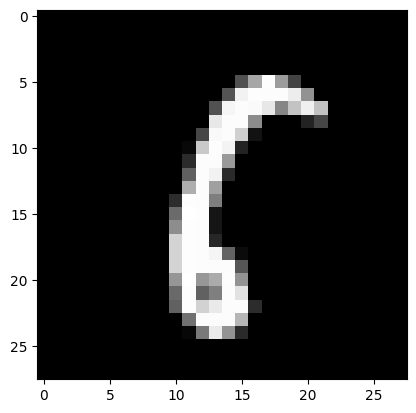

Prediction:  [9]
Label:  9


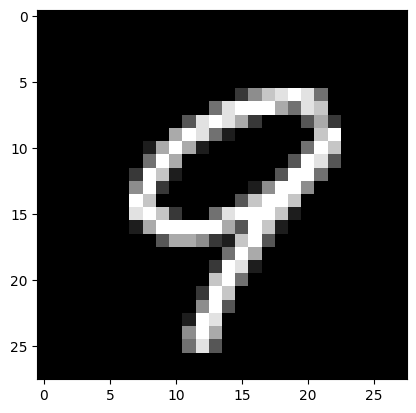

Prediction:  [0]
Label:  0


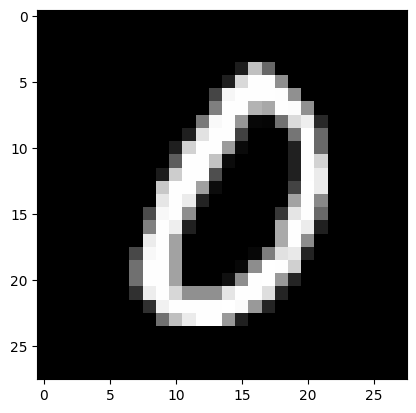

Prediction:  [8]
Label:  8


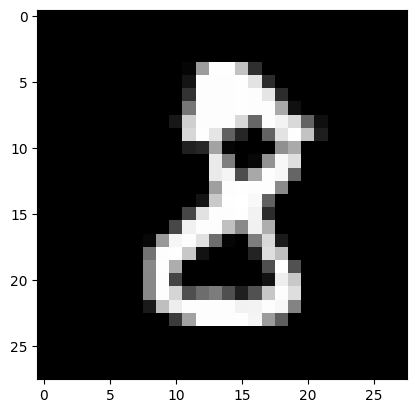

In [55]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [56]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 5 4 1 3 0 2 8 8 3 0 1 7 0 2 9 4 0 6 5 0 3 4 8 9 4 4 2 0 9 3 4 3 0 0 1 3
 6 2 0 9 4 4 4 7 4 3 9 2 5 6 1 4 0 9 3 4 2 7 6 9 5 8 6 0 9 1 6 3 6 5 5 6 6
 6 8 8 8 4 1 9 0 5 5 7 1 1 0 4 6 9 4 1 7 6 1 7 6 3 9 5 9 3 8 6 4 3 8 1 6 8
 5 4 1 1 9 4 4 6 1 7 8 4 3 3 6 0 0 0 1 1 6 7 6 5 8 0 0 0 3 3 6 3 8 6 1 4 8
 6 3 5 3 3 0 6 3 4 9 6 2 6 3 9 7 9 9 3 3 2 7 0 3 3 1 1 2 5 1 8 2 2 0 5 6 1
 5 2 5 9 9 1 4 2 3 6 0 0 1 6 4 1 6 7 5 0 6 4 6 0 0 8 7 9 0 3 2 6 4 8 4 7 4
 5 8 1 5 0 0 2 9 6 4 1 7 4 2 4 9 3 3 1 7 0 1 7 0 1 6 5 3 6 4 8 5 4 4 2 6 2
 6 6 2 3 9 9 5 6 8 0 5 2 2 6 9 5 5 1 9 7 2 0 6 0 8 8 3 6 8 1 5 6 7 3 6 6 2
 3 9 3 3 9 1 3 3 5 3 3 9 3 6 7 7 6 1 2 6 9 3 9 9 1 2 1 7 7 7 0 8 4 2 7 1 1
 5 7 9 0 2 8 7 8 6 2 6 2 0 3 9 1 2 7 2 1 3 9 8 7 0 9 1 1 4 8 9 2 9 5 3 6 1
 2 1 0 5 4 9 1 6 6 6 7 5 7 3 6 9 4 9 2 6 8 9 6 3 5 4 3 3 1 3 0 4 9 5 2 5 4
 2 4 1 3 4 8 5 9 2 2 9 3 7 2 0 9 0 3 8 3 6 0 3 2 0 2 4 0 2 6 1 6 6 3 9 4 3
 9 7 1 0 5 2 1 5 3 1 9 5 4 1 0 6 2 9 3 3 3 9 9 4 8 4 4 3 2 4 4 4 7 9 4 8 7
 7 5 6 4 8 9 2 0 0 3 6 0 

0.829